In [1]:
import os
import cv2
import numpy as np

def load_data_from_dir(directory):
    labels_dict = {"normal": 0, "pneumonia": 1}
    data = []
    labels = []
    
    for sub_folder, label in labels_dict.items():
        sub_folder_path = os.path.join(directory, sub_folder)
        for image_file in os.listdir(sub_folder_path):
            image = cv2.imread(os.path.join(sub_folder_path, image_file), cv2.IMREAD_GRAYSCALE)
            data.append(cv2.resize(image, (128, 128)))  # resizing the image to a standard size
            labels.append(label)
    
    return np.array(data), np.array(labels)



Metrics for Training:
Accuracy: 1.00000
F1 Score: 1.00000
Precision: 1.00000
Recall: 1.00000
Log Loss: 0.00875

Metrics for Testing:
Accuracy: 0.96762
F1 Score: 0.97069
Precision: 0.97412
Recall: 0.96729
Log Loss: 0.10094

Metrics for Validation:
Accuracy: 0.97795
F1 Score: 0.97998
Precision: 0.98578
Recall: 0.97424
Log Loss: 0.06547


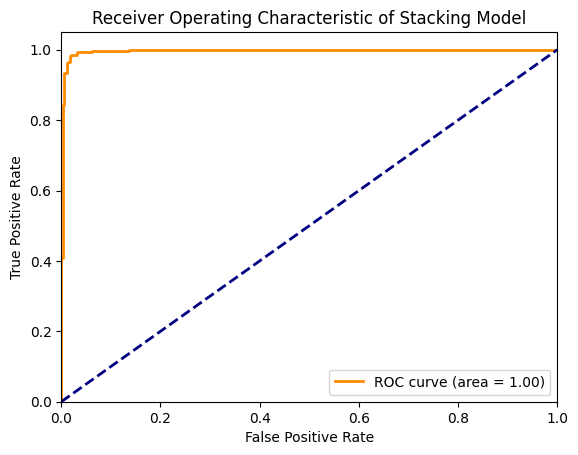

In [3]:
import os
import cv2
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt


# Load Data
train_images, train_labels = load_data_from_dir("data_to_model/train")
test_images, test_labels = load_data_from_dir("data_to_model/test")
val_images, val_labels = load_data_from_dir("data_to_model/validation")

# Flatten the images
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))
val_images_flat = val_images.reshape((val_images.shape[0], -1))

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=150, random_state=42)),
    ('svm', SVC(kernel='poly', degree=3))
]

# Initialize Stacking Classifier with Logistic Regression as meta-model
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)

# Train the stacking model
stack_model.fit(train_images_flat, train_labels)

# Prediction and Performance Evaluation
def evaluate_model_predictions(model, data, labels, dataset_name):
    predictions = model.predict(data)
    proba = model.predict_proba(data)[:, 1]

    print(f"\nMetrics for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(labels, predictions):.5f}")
    print(f"F1 Score: {f1_score(labels, predictions):.5f}")
    print(f"Precision: {precision_score(labels, predictions):.5f}")
    print(f"Recall: {recall_score(labels, predictions):.5f}")
    print(f"Log Loss: {log_loss(labels, proba):.5f}")

    return predictions, proba

# Evaluate models
_, train_proba = evaluate_model_predictions(stack_model, train_images_flat, train_labels, 'Training')
_, test_proba = evaluate_model_predictions(stack_model, test_images_flat, test_labels, 'Testing')
val_pred, val_proba = evaluate_model_predictions(stack_model, val_images_flat, val_labels, 'Validation')

# Plot ROC curve for validation data
fpr, tpr, _ = roc_curve(val_labels, val_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Stacking Model')
plt.legend(loc="lower right")
plt.show()



Metrics for Training:
Accuracy: 1.00000
F1 Score: 1.00000
Precision: 1.00000
Recall: 1.00000
Log Loss: 0.00886

Metrics for Testing:
Accuracy: 0.94948
F1 Score: 0.95406
Precision: 0.96200
Recall: 0.94626
Log Loss: 0.13863

Metrics for Validation:
Accuracy: 0.97276
F1 Score: 0.97550
Precision: 0.97209
Recall: 0.97892
Log Loss: 0.08230


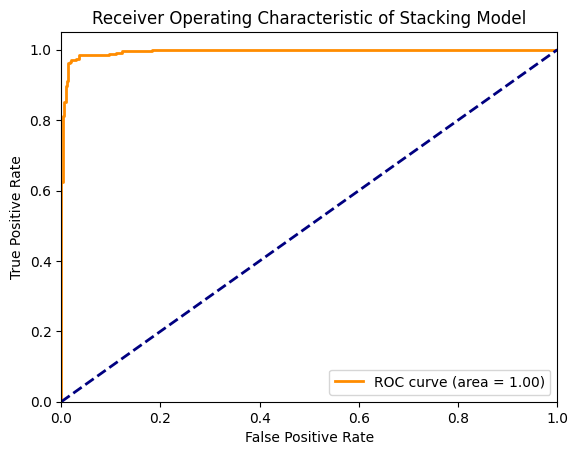

In [2]:
import os
import cv2
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt


# Load Data
train_images, train_labels = load_data_from_dir("data_to_model_augmented/train")
test_images, test_labels = load_data_from_dir("data_to_model/test")
val_images, val_labels = load_data_from_dir("data_to_model/validation")

# Flatten the images
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))
val_images_flat = val_images.reshape((val_images.shape[0], -1))

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=150, random_state=42)),
    ('svm', SVC(kernel='poly', degree=3))
]

# Initialize Stacking Classifier with Logistic Regression as meta-model
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)

# Train the stacking model
stack_model.fit(train_images_flat, train_labels)

# Prediction and Performance Evaluation
def evaluate_model_predictions(model, data, labels, dataset_name):
    predictions = model.predict(data)
    proba = model.predict_proba(data)[:, 1]

    print(f"\nMetrics for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(labels, predictions):.5f}")
    print(f"F1 Score: {f1_score(labels, predictions):.5f}")
    print(f"Precision: {precision_score(labels, predictions):.5f}")
    print(f"Recall: {recall_score(labels, predictions):.5f}")
    print(f"Log Loss: {log_loss(labels, proba):.5f}")

    return predictions, proba

# Evaluate models
_, train_proba = evaluate_model_predictions(stack_model, train_images_flat, train_labels, 'Training')
_, test_proba = evaluate_model_predictions(stack_model, test_images_flat, test_labels, 'Testing')
val_pred, val_proba = evaluate_model_predictions(stack_model, val_images_flat, val_labels, 'Validation')

# Plot ROC curve for validation data
fpr, tpr, _ = roc_curve(val_labels, val_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Stacking Model')
plt.legend(loc="lower right")
plt.show()
